In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score

In [296]:
X_train = pd.read_csv("../coursework/x_train_all.csv")
X_test = pd.read_csv("../coursework/x_test_all.csv")
y_train = pd.read_csv("../coursework/y_train_all.csv")
y_test = pd.read_csv("../coursework/y_test_all.csv")

# Count of each category instance in the training dataset

In [297]:
value_counts = y_train.value_counts()
value_counts

0
2    2250
1    2220
4    1980
3    1410
8     540
6     360
9     270
7     240
0     210
5     210
dtype: int64

<Axes: ylabel='0'>

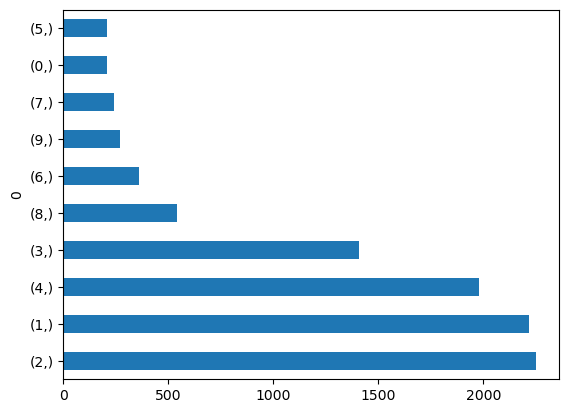

In [298]:
value_counts.plot(kind='barh')

# Balance the Dataset

We see that the data is imbalanced. So we balance it so that each class has similar number of rows.

In [299]:
y_train.columns = ['Class']

concatenated = pd.concat([X_train, y_train.rename(columns={0: "Output"})], axis="columns")
concatenated.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,Class
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0,0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0,0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0,0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0,0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0,0


Helper function to aid in upsampling of classes

In [300]:
def resample_42(li):
    return resample(li, 
         replace=True,    # sample with replacement
         n_samples= 2250, # to match majority class
         random_state=42) # reproducible results

In [301]:
# Create two different dataframe of majority and minority class 
df_balanced = []

for i in range(10):
    balanced = concatenated[(concatenated['Class'] == i)]
    if i != 2:
        balanced = resample_42(balanced) # resample using a predefined state
    df_balanced.append(balanced)
    
result = pd.concat(df_balanced)
result.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,Class
102,21.0,23.0,25.0,26.0,29.0,30.0,32.0,34.0,36.0,39.0,...,144.0,134.0,125.0,116.0,109.0,101.0,121.0,138.0,143.0,0
179,138.0,112.0,110.0,110.0,110.0,110.0,108.0,106.0,104.0,106.0,...,196.0,198.0,209.0,203.0,197.0,199.0,194.0,193.0,203.0,0
92,22.0,22.0,21.0,22.0,22.0,23.0,27.0,31.0,35.0,37.0,...,158.0,162.0,160.0,158.0,159.0,141.0,112.0,86.0,69.0,0
14,132.0,134.0,98.0,70.0,67.0,88.0,138.0,216.0,247.0,254.0,...,81.0,87.0,82.0,80.0,74.0,74.0,82.0,92.0,102.0,0
106,24.0,26.0,27.0,28.0,30.0,33.0,35.0,37.0,38.0,36.0,...,145.0,141.0,127.0,110.0,100.0,98.0,100.0,115.0,128.0,0


In [302]:
X_train_upsampled = result.drop(["Class"], axis=1)
X_train_upsampled.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
102,21.0,23.0,25.0,26.0,29.0,30.0,32.0,34.0,36.0,39.0,...,153.0,144.0,134.0,125.0,116.0,109.0,101.0,121.0,138.0,143.0
179,138.0,112.0,110.0,110.0,110.0,110.0,108.0,106.0,104.0,106.0,...,193.0,196.0,198.0,209.0,203.0,197.0,199.0,194.0,193.0,203.0
92,22.0,22.0,21.0,22.0,22.0,23.0,27.0,31.0,35.0,37.0,...,155.0,158.0,162.0,160.0,158.0,159.0,141.0,112.0,86.0,69.0
14,132.0,134.0,98.0,70.0,67.0,88.0,138.0,216.0,247.0,254.0,...,75.0,81.0,87.0,82.0,80.0,74.0,74.0,82.0,92.0,102.0
106,24.0,26.0,27.0,28.0,30.0,33.0,35.0,37.0,38.0,36.0,...,147.0,145.0,141.0,127.0,110.0,100.0,98.0,100.0,115.0,128.0


# Count of each category instance in the training dataset after balancing

In [303]:
y_train_upsampled =result["Class"]
y_train_upsampled.value_counts()

0    2250
1    2250
2    2250
3    2250
4    2250
5    2250
6    2250
7    2250
8    2250
9    2250
Name: Class, dtype: int64

# KMeans clustering

In [304]:
kmeans_1 = KMeans(n_clusters=10, random_state=42)
y_pred_1 = kmeans_1.fit_predict(X_train)
y_pred_1

/Users/sayisha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [305]:
y_pred_1 is kmeans_1.labels_

True

In [306]:
kmeans_1.cluster_centers_

array([[122.15840622, 122.57920311, 123.5393586 , ..., 125.44800777,
        124.75024295, 124.60932945],
       [ 28.50943396,  28.23525943,  28.03714623, ...,  20.76356132,
         20.74882075,  20.96816038],
       [197.84309133, 197.74941452, 199.7236534 , ..., 192.64871194,
        193.8501171 , 194.37236534],
       ...,
       [242.86909871, 241.78111588, 240.32832618, ..., 168.79184549,
        166.05364807, 164.05150215],
       [ 57.28821293,  57.78098859,  57.90190114, ...,  50.00684411,
         50.06996198,  50.078327  ],
       [ 44.07865731,  43.89779559,  43.68436874, ...,  37.70891784,
         37.76753507,  37.749499  ]])

In [307]:
kmeans_1.cluster_centers_.shape

(10, 2304)

# Showing the classes belonging to each cluster

We are mapping the number of instances of each cluster to how many classes it contains. Ideally each cluster should have only instances that belong to one class.

In [308]:
image_cluster_1 = pd.DataFrame(y_train,columns=['Class'])
image_cluster_1['clusterid'] = y_pred_1
image_cluster_1

,Class,clusterid
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
9685,9,4
9686,9,4
9687,9,4
9688,9,4


In [309]:
def mapping_cluster_to_classes(n_range, cluster, cols, cluster_labels):
    data = []
    for clusterId in range(n_range):
        clusterRows = cluster.loc[cluster['clusterid'] == clusterId]
        clusterRows = clusterRows.drop(["clusterid"], axis=1)
        value_counts = clusterRows.value_counts()
        count_arr = []
        for i in range(n_range):
            class_count = clusterRows.value_counts().get(i, 0)
            count_arr.append(class_count)
        data.append(count_arr)  
    print("data \n")    
    df = pd.DataFrame(data, index=cluster_labels, columns=cols)  
    print(df)

clusterLabels = [f'Cluster {i}' for i in range(10)]
cols = [f'Class {i}' for i in range(10)]

mapping_cluster_to_classes(10, image_cluster_1, cols, clusterLabels)

data 

           Class 0  Class 1  Class 2  Class 3  Class 4  Class 5  Class 6  \
Cluster 0      107      480      173       50       61       21        4   
Cluster 1        0       98      191      450      669       30      152   
Cluster 2       26      190       52       11       49        4        0   
Cluster 3       37      295      190      115      175       12       29   
Cluster 4        4       41      123      182       56        2       43   
Cluster 5        0      173      215        0      143        0        0   
Cluster 6       18      233      296        7      167       22        0   
Cluster 7        9      105       58      181       28        1       21   
Cluster 8        9      285      442       35      320       38        3   
Cluster 9        0      320      510      379      312       80      108   

           Class 7  Class 8  Class 9  
Cluster 0       15      108       10  
Cluster 1       22       82        2  
Cluster 2        0       82       13  


# SCATTER PLOT OF CENTROIDS

We show the centroids of just two features on a 2-D plane.

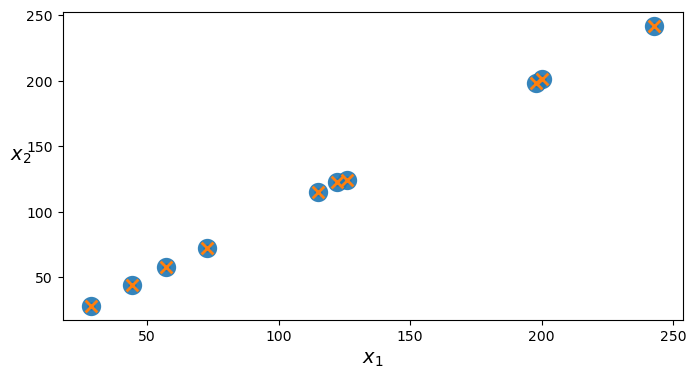

In [310]:

def plot_centroids(centroids, weights=None):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                 zorder=11, alpha=1)

    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_centroids(kmeans_1.cluster_centers_)
plt.show()

We show the scatter plot of centroids of all the features. We see that some points are intersecting. This shows that K-Means will be confused while classification. The best value is when all clusters are completely separated.


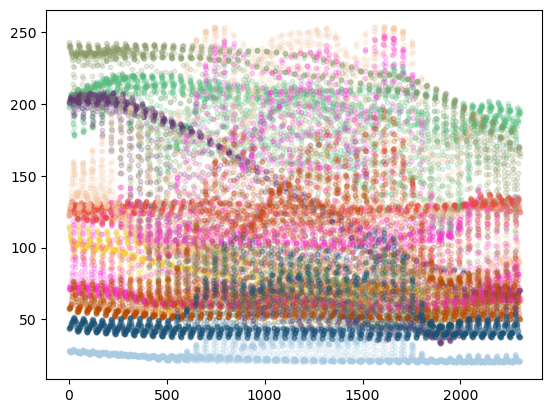

In [311]:
x_data = [i for i in range(2304)]
plt.scatter(x_data,kmeans_1.cluster_centers_[0], color = '#E74C3C',alpha=0.2,s=10)
plt.scatter(x_data,kmeans_1.cluster_centers_[1] , color = '#A9CCE3',alpha=0.2,s=10)
plt.scatter(x_data,kmeans_1.cluster_centers_[2], color = '#52BE80',alpha=0.2,s=10)
plt.scatter(x_data,kmeans_1.cluster_centers_[3] , color = '#F4D03F',alpha=0.2,s=10)
plt.scatter(x_data,kmeans_1.cluster_centers_[4], color = '#633974',alpha=0.2,s=10)
plt.scatter(x_data,kmeans_1.cluster_centers_[5] , color = '#F5CBA7',alpha=0.2,s=10)
plt.scatter(x_data,kmeans_1.cluster_centers_[6], color = '#FF33DD',alpha=0.2,s=10)
plt.scatter(x_data,kmeans_1.cluster_centers_[7] , color = '#8A9B66',alpha=0.2,s=10)
plt.scatter(x_data,kmeans_1.cluster_centers_[8], color = '#BA4A00',alpha=0.2,s=10)
plt.scatter(x_data,kmeans_1.cluster_centers_[9] , color = '#1A5276',alpha=0.2,s=10)

# Inertia

In [312]:
kmeans_1.inertia_

37479080246.35051

# Score

In [313]:
kmeans_1.score(X_train)

-37479080246.35052

# Elbow method

In [314]:
from sklearn.cluster import KMeans
inertias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    inertias.append(kmeans.inertia_)


/Users/sayisha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sayisha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sayisha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sayisha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

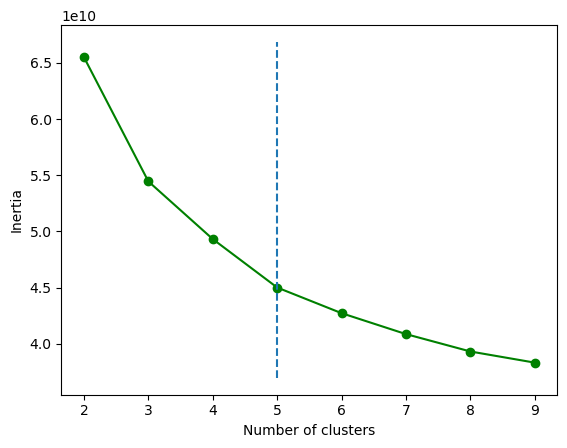

In [315]:
plt.plot(range(2,10), inertias, "o-g")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.vlines(5, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

6 is the optimal number of clusters

# Silhouette Scores

The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster

In [316]:
silhouette_score(X_train, kmeans.labels_) #computes the overall silhouette score

0.14527655897332947

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train)
                for k in range(2, 11)]

/Users/sayisha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sayisha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
silhouette_scores = [silhouette_score(X_train, model.labels_)
                     for model in kmeans_per_k[0:]]   

In [ ]:
silhouette_scores

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 11), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
#save_fig("silhouette_score_vs_k_plot")
plt.show()

In [ ]:

for n_clusters in range(2, 11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(5, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_train) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_train)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# Gaussian Mixture

In [ ]:
gmm = GaussianMixture(n_components=10, covariance_type='full', random_state=42)
gmm.fit(X_train)

In [ ]:
labels_gmm = gmm.predict(X_train)
labels_gmm

# Showing the classes belonging to each cluster

In [ ]:
image_cluster_2 = pd.DataFrame(y_train, columns=['Class'])
image_cluster_2['clusterid'] = labels_gmm
image_cluster_2

In [ ]:
mapping_cluster_to_classes(10, image_cluster_2, cols, clusterLabels)

# Silhouette Scores

In [ ]:
silhouette_score(X_train, labels_gmm) #computes the overall silhouette score

In [ ]:
models_1 = GaussianMixture(n_components=2, covariance_type='full', random_state=42).fit(X_train)

In [ ]:
models_2 = GaussianMixture(n_components=3, covariance_type='full', random_state=42).fit(X_train)

In [ ]:
models_3 = GaussianMixture(n_components=4, covariance_type='full', random_state=42).fit(X_train)

In [ ]:
models_4 = GaussianMixture(n_components=5, covariance_type='full', random_state=42).fit(X_train)

In [ ]:
models_5 = GaussianMixture(n_components=6, covariance_type='full', random_state=42).fit(X_train)

In [ ]:
models_6 = GaussianMixture(n_components=7, covariance_type='full', random_state=42).fit(X_train)

In [ ]:
models_7 = GaussianMixture(n_components=8, covariance_type='full', random_state=42).fit(X_train)

In [ ]:
models_8 = GaussianMixture(n_components=9, covariance_type='full', random_state=42).fit(X_train)

In [ ]:
models_9 = GaussianMixture(n_components=10, covariance_type='full', random_state=42).fit(X_train)

In [ ]:
models_10 = GaussianMixture(n_components=11, covariance_type='full', random_state=42).fit(X_train)

In [ ]:
models_11 = GaussianMixture(n_components=12, covariance_type='full', random_state=42).fit(X_train)

In [ ]:
models_12 = GaussianMixture(n_components=13, covariance_type='full', random_state=42).fit(X_train)

In [ ]:
models_13 = GaussianMixture(n_components=14, covariance_type='full', random_state=42).fit(X_train)

In [ ]:
models_14 = GaussianMixture(n_components=15, covariance_type='full', random_state=42).fit(X_train)

In [ ]:
models = [models_1,models_2,models_3,models_4,models_5,models_6,models_7,models_8,models_9,models_10,models_11,models_12,models_13,models_14]

In [ ]:
labels_1 = models_1.predict(X_train)
labels_2 = models_2.predict(X_train)
labels_3 = models_3.predict(X_train)
labels_4 = models_4.predict(X_train)
labels_5 = models_5.predict(X_train)
labels_6 = models_6.predict(X_train)
labels_7 = models_7.predict(X_train)
labels_8 = models_8.predict(X_train)
labels_9 = models_9.predict(X_train)
labels_10 = models_10.predict(X_train)
labels_11 = models_11.predict(X_train)
labels_12 = models_12.predict(X_train)
labels_13 = models_13.predict(X_train)
labels_14 = models_14.predict(X_train)


In [ ]:
silhouette_score_1 = silhouette_score(X_train, labels_1)
silhouette_score_2 = silhouette_score(X_train, labels_2)                    
silhouette_score_3 = silhouette_score(X_train, labels_3)
silhouette_score_4 = silhouette_score(X_train, labels_4)
silhouette_score_5 = silhouette_score(X_train, labels_5)                    
silhouette_score_6 = silhouette_score(X_train, labels_6)
silhouette_score_7 = silhouette_score(X_train, labels_7)
silhouette_score_8 = silhouette_score(X_train, labels_8)                    
silhouette_score_9 = silhouette_score(X_train, labels_9)
silhouette_score_10 = silhouette_score(X_train, labels_10)
silhouette_score_11 = silhouette_score(X_train, labels_11)                    
silhouette_score_12 = silhouette_score(X_train, labels_12)
silhouette_score_13 = silhouette_score(X_train, labels_13)
silhouette_score_14 = silhouette_score(X_train, labels_14)                    


In [ ]:
silhouette_scores_gmm = [silhouette_score_1,silhouette_score_2,silhouette_score_3,silhouette_score_4,
                     silhouette_score_5,
                     silhouette_score_6,silhouette_score_7,silhouette_score_8,silhouette_score_9,
                     silhouette_score_10,silhouette_score_11,silhouette_score_12,
                     silhouette_score_13,silhouette_score_14
                    ]

In [ ]:
silhouette_scores_gmm

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 16), silhouette_scores_gmm, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
#save_fig("silhouette_score_vs_k_plot")
plt.show()

In [ ]:
for n_clusters in range(2, 16):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(5, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_train) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = GaussianMixture(n_components=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_train)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# AIC vs BIC

Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) are both model selection criteria that are used to compare different models and choose the one that best fits the data.
AIC is based on the maximum likelihood principle, and it penalizes models with a large number of parameters relative to the size of the data. 
BIC is similar to AIC, but it penalizes models with a larger number of parameters more severely. 


In [ ]:
bic_1 = models_1.bic(X_train)
bic_2 = models_2.bic(X_train)
bic_3 = models_3.bic(X_train)
bic_4 = models_4.bic(X_train)
bic_5 = models_5.bic(X_train)
bic_6 = models_6.bic(X_train)
bic_7 = models_7.bic(X_train)
bic_8 = models_8.bic(X_train)
bic_9 = models_9.bic(X_train)
bic_10 = models_10.bic(X_train)
bic_11 = models_11.bic(X_train)
bic_12 = models_12.bic(X_train)
bic_13 = models_13.bic(X_train)
bic_14 = models_14.bic(X_train)

In [ ]:
bic_arr = [bic_1,bic_2,bic_3,bic_4,bic_5,bic_6,bic_7,bic_8,bic_9,bic_10,bic_11,bic_12,bic_13,bic_14]

In [ ]:
aic_1 = models_1.aic(X_train)
aic_2 = models_2.aic(X_train)
aic_3 = models_3.aic(X_train)
aic_4 = models_4.aic(X_train)
aic_5 = models_5.aic(X_train)
aic_6 = models_6.aic(X_train)
aic_7 = models_7.aic(X_train)
aic_8 = models_8.aic(X_train)
aic_9 = models_9.aic(X_train)
aic_10 = models_10.aic(X_train)
aic_11 = models_11.aic(X_train)
aic_12 = models_12.aic(X_train)
aic_13 = models_13.aic(X_train)
aic_14 = models_14.aic(X_train)

In [ ]:
aic_arr = [aic_1,aic_2,aic_3,aic_4,aic_5,aic_6,aic_7,aic_8,aic_9,aic_10,aic_11,aic_12,aic_13,aic_14]

In [ ]:
n_components = np.arange(2, 16)

In [ ]:
plt.plot(n_components, bic_arr, label='BIC')
plt.plot(n_components, aic_arr, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In our case we see that AIC and BIC give very different model selections. The AIC is better suited to model selection for prediction as it is asymptotically equivalent to leave-one-out cross-validation in regression, or one-step-cross-validation in time series. On the other hand, it might be argued that the BIC is better suited to model selection for explanation, as it is consistent.

Hence we will use the AIC since we are looking for a good predictive model

The optimal number of clusters is the value that minimizes the AIC. The AIC tells us that around 10-12 clusters would have been a better choice. 
